In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\rahul.a.tripathi\Desktop\Nokia\HubwayTrips.csv")
df.head()

,Duration,Morning,Afternoon,Evening,Weekday,Male,Age
0,212,0,1,0,1,1,17
1,229,0,1,0,1,1,17
2,259,0,0,1,0,0,17
3,273,0,1,0,1,1,17
4,279,0,1,0,1,0,17


In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, init='k-means++', n_init=10)

In [15]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
x = km.fit_predict(df)
x

array([0, 0, 0, ..., 4, 4, 3])

In [17]:
df["Cluster"]= x
df.head()

,Duration,Morning,Afternoon,Evening,Weekday,Male,Age,Cluster
0,212,0,1,0,1,1,17,0
1,229,0,1,0,1,1,17,0
2,259,0,0,1,0,0,17,0
3,273,0,1,0,1,1,17,0
4,279,0,1,0,1,0,17,0


In [18]:
df = df.sort_values(['Cluster'])
df.head()

,Duration,Morning,Afternoon,Evening,Weekday,Male,Age,Cluster
0,212,0,1,0,1,1,17,0
142069,333,0,1,0,1,1,44,0
142070,333,0,1,0,1,1,44,0
142071,333,0,1,0,1,1,44,0
142072,333,0,0,1,1,1,44,0


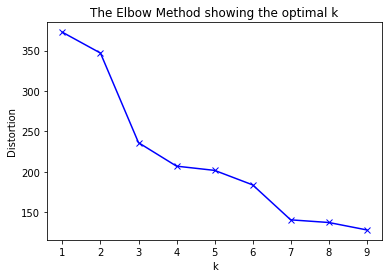

In [22]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
df.to_csv(r"C:\Users\rahul.a.tripathi\Desktop\Nokia\cluster.csv")

NameError: name 'X' is not defined